#  了解TensorFlow

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
a = np.array([1, 2])  # 一维数组
b = np.array([2, 3])
a + b

array([3, 5])

In [3]:
# 定义计算（没有执行）
a = tf.constant([1, 2])
b = tf.constant([2, 3])
my_sum = a + b
my_sum

<tf.Tensor 'add:0' shape=(2,) dtype=int32>

In [4]:
# 执行计算
sess = tf.Session()  # 定义会话(启动会话)
print(sess.run(my_sum))
sess.close()  # 关闭会话

[3 5]


In [5]:
with tf.Session() as sess:
    print(sess.run(my_sum))

[3 5]


数据类型：Tensor

* tf.constant() 常量，不会发生任何改变
* tf.Variable() 变量，在执行计算过程会发生变化，需要初始化
* tf.placeholder() 占位符，一般用于模型数据的输入 x 与输出 y

# 任务一：拟合曲线
求 y=a∗x1+b∗x2+c 里面的a、b、c

## 读取文件

In [6]:
import pandas as pd
f = r'D:\JupyterProjects\qingdao1907\tensorflowPractice\data\lines.csv'
f = '.\\data\\lines.csv'
f = './data/lines.csv'
data = pd.read_csv(f, index_col=0)
data.head(7)  # 查看数据前7行
# data.tail(7)  # 查看数据后7行

,X_1,X_2,Y
0,0.6963,0.2861,6.250
1,0.2268,0.5513,6.110
2,0.7190,0.4230,6.707
3,0.9810,0.6850,8.016
4,0.4810,0.3920,6.137
5,0.3433,0.7290,6.875
6,0.4385,0.0597,5.055


windows下三种工作路径写法

* 'C:\\Users\\45543\\Desktop\\201901培训'
* 'C:/Users/45543/Desktop/201901培训'
* r'C:\Users\45543\Desktop\201901培训' # raw material

## 构造线性模型
y=a∗x1+b∗x2+c

In [7]:
# 数据节点
x_1 = tf.placeholder(tf.float32)
x_2 = tf.placeholder(tf.float32)
y_real = tf.placeholder(tf.float32)

a = tf.Variable([0], dtype=tf.float32)
b = tf.Variable([0], dtype=tf.float32)
c = tf.Variable([0], dtype=tf.float32)

In [8]:
y_pre = a*x_1 + b*x_2 + c  # 计算节点

##  定义损失函数，最小化方差

In [9]:
loss = tf.reduce_mean(
    tf.square(y_pre - y_real)
)  # 损失函数
lr = 0.05  # 学习率
# 优化器
opt = tf.train.GradientDescentOptimizer(lr)
train_op = opt.minimize(loss)  # 最小化损失函数

## 执行计算图
y=2∗x1+3∗x2+4

In [10]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)  # 全局变量初始化
    for i in range(1000):
        _, cost = sess.run(
            [train_op, loss], 
            feed_dict={
                       x_1: data['X_1'],
                       x_2: data['X_2'],
                       y_real: data['Y']
                      })
        if i % 200 == 0:
            print(sess.run([a, b, c]), cost)

[array([0.3313334], dtype=float32), array([0.3557744], dtype=float32), array([0.652867], dtype=float32)] 43.411983
[array([1.9687597], dtype=float32), array([2.791556], dtype=float32), array([4.127519], dtype=float32)] 0.0029993646
[array([1.9628719], dtype=float32), array([2.925966], dtype=float32), array([4.058332], dtype=float32)] 0.00042107803
[array([1.9782832], dtype=float32), array([2.9698544], dtype=float32), array([4.0268893], dtype=float32)] 8.158611e-05
[array([1.9888612], dtype=float32), array([2.986413], dtype=float32), array([4.0125947], dtype=float32)] 1.891336e-05


# 任务二：利用softmax对MNIST手写字体进行识别


## 读取MNIST文件，并展示

In [ ]:
# 读取文件
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets( './data/MNIST_data/', one_hot=True)

In [6]:
# 读取文件
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
mnist = read_data_sets( './data/MNIST_data/', one_hot=True)

Extracting ./data/MNIST_data/train-images-idx3-ubyte.gz
Extracting ./data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
# 打印训练集数据的大小
print(mnist.train.images.shape)
print(mnist.train.labels.shape)

(55000, 784)
(55000, 10)


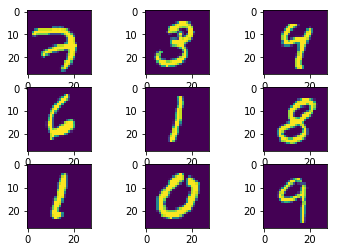

array([7, 3, 4, 6, 1, 8, 1, 0, 9], dtype=int64)

In [8]:
# MNIST手写字体的图形展示
import matplotlib.pyplot as plt
import numpy as np
for i in range(9):
    im = mnist.train.images[i].reshape(28, 28)
    plt.subplot(3, 3, i+1)
    plt.imshow(im)
plt.show()
np.argmax(mnist.train.labels[:9, :], axis=1)

In [9]:
# 独热编码展示
import tensorflow as tf
from sklearn.datasets import load_iris
iris = load_iris()
print('原始数据：', iris['target'])
x = tf.placeholder(tf.int32)
with tf.Session() as sess:
    print('独热编码结果展示：\n', 
        sess.run(
        tf.one_hot(x, depth=3), 
        feed_dict={x:iris['target']}
    ))

原始数据： [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
独热编码结果展示：
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 

## 定义计算图
定义tensor

In [10]:
tf.reset_default_graph()  # 重置默认计算图
input_size = 784  # 输入层神经元个数
output_size = 10  # 输出层神经元个数
x = tf.placeholder(tf.float32, [None, input_size])
y_real = tf.placeholder(tf.float32, [None, output_size])
w = tf.Variable(
    tf.zeros([input_size, output_size], dtype=tf.float32)
)
b = tf.Variable(
    tf.zeros([output_size], dtype=tf.float32)
)

计算图构建

In [11]:
y_pre = tf.nn.softmax(tf.matmul(x, w) - b)
loss = tf.reduce_mean(
    - tf.reduce_sum(y_real * tf.log(y_pre), 
                    axis=1)
)  # 损失函数：交叉熵损失函数
lr = 0.02  # 学习率learning-rate
# 优化器
opt = tf.train.GradientDescentOptimizer(lr)
train_op = opt.minimize(loss)

In [12]:
a1 = tf.argmax(y_pre, axis=1)
a2 = tf.argmax(y_real, axis=1)
c = tf.cast(tf.equal(a1, a2), 'float')
acc = tf.reduce_mean(c)

## 执行计算

In [13]:
with tf.Session() as sess:
    # 全局变量初始化
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        tmp = mnist.train.next_batch(100)
        _, cost, score = sess.run(
            [train_op, loss, acc], feed_dict={
                x: tmp[0],
                y_real: tmp[1]
            }
        )
        if i % 100 == 0:
            cost2, score2 = sess.run(
                [loss, acc], feed_dict={
                    x: mnist.test.images,
                    y_real: mnist.test.labels
                }
            )
#             print(i, cost2, score2)
#             print('第{}次 损失值为{} 正确率为{}'.format(i, cost2, score2))
            print(f'第{i}次 损失值为{cost2} 正确率为{score2*100:.2f}%')

第0次 损失值为2.280778408050537 正确率为31.03%
第100次 损失值为1.1693542003631592 正确率为81.00%
第200次 损失值为0.8556986451148987 正确率为83.49%
第300次 损失值为0.7150901556015015 正确率为85.69%
第400次 损失值为0.6357974410057068 正确率为86.60%
第500次 损失值为0.5850017666816711 正确率为87.15%
第600次 损失值为0.5478724837303162 正确率为87.57%
第700次 损失值为0.5213122963905334 正确率为87.97%
第800次 损失值为0.4983038008213043 正确率为88.14%
第900次 损失值为0.4816811978816986 正确率为88.28%


In [14]:
mnist.train.labels.shape
for i in range(10):
    a = mnist.train.next_batch(5)
    print(np.argmax(a[1], axis=1))

[4 3 4 3 5]
[6 2 2 6 4]
[0 1 0 2 4]
[4 5 4 1 7]
[2 5 5 3 9]
[7 8 3 3 8]
[5 4 7 3 4]
[4 9 1 2 9]
[5 6 3 9 7]
[4 1 1 7 4]


# 任务三：利用BP神经网络进行鸢尾花数据集分类
## 获取数据，并划分数据集

In [15]:
# 获取鸢尾花数据集
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())
x_data = iris['data']
y_data = iris['target']

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [16]:
# 划分训练集、测试集
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data,
    test_size=0.2,  # 训练集：测试集=8:2
    random_state=123  # 随机种子
)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## 计算图构建

In [17]:
import tensorflow as tf
tf.reset_default_graph()  # 重置默认计算图

# 定义基本参数
input_size = 4  # 输入层神经元个数
output_size = 3  # 输出层神经元个数
hidden_size = 8  # 隐层神经元个数
lr = 0.1  # 学习率, 0.001-0.0001

# 定义tensor
x = tf.placeholder(tf.float32, [None, input_size])
y = tf.placeholder(tf.int64)
y_real = tf.one_hot(y, depth=output_size, 
                    dtype=tf.float32)

# input layer --> hidden layer
v = tf.Variable(
    tf.zeros([input_size, hidden_size],
             dtype=tf.float32)
)
b1 = tf.Variable(
    tf.zeros([hidden_size], dtype=tf.float32)
)
# hidden layer --> output layer
w = tf.Variable(
    tf.zeros([hidden_size, output_size],
             dtype=tf.float32)
)
b2 = tf.Variable(
    tf.zeros([output_size], dtype=tf.float32)
)

In [18]:
# 隐层神经元的输出
hidden_out = tf.sigmoid(tf.matmul(x, v) - b1)

# 输出层的输出
y_pre = tf.nn.softmax(
    tf.matmul(hidden_out, w) - b2
)
# 损失函数
loss = tf.reduce_mean(
    -tf.reduce_sum(y_real * tf.log(y_pre), axis=1)
)
# 优化器
opt = tf.train.GradientDescentOptimizer(lr)
# 训练节点
train_op = opt.minimize(loss)

In [19]:
# 计算正确率
tmp = tf.equal(
    tf.argmax(y_pre, axis=1), y
)  # 判断预测值和真实值是否相等
acc = tf.reduce_mean(tf.cast(tmp, 'float'))

In [20]:
# 查看独热编码后的结果
with tf.Session() as sess:
    print(sess.run(y_real, 
                   feed_dict={y: y_train[:5]}))

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


## 执行计算图

In [21]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(1000):
        sess.run(train_op, feed_dict={
            x: x_train, y: y_train
        })
        
        if i % 200 == 0:
            cost, score = sess.run(
                [loss, acc], feed_dict={
                    x: x_test, y: y_test
                }
            )
            print(cost, score)
        y_ = sess.run(y_pre,
                      feed_dict={x: x_test})

1.1008061 0.2
1.1035699 0.2
0.644962 0.8333333
0.42549452 0.8666667
0.3551818 0.96666664


## 分类问题评估

In [22]:
import numpy as np
np.argmax(y_, axis=1)  # 查看预测值

array([2, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 0], dtype=int64)

In [23]:
y_test  # 真实值

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 0])

In [24]:
# 混淆矩阵
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, 
                 np.argmax(y_, axis=1))

array([[13,  0,  0],
       [ 0,  5,  1],
       [ 0,  0, 11]], dtype=int64)

In [25]:
# 查准率、查全率、F1值
from sklearn.metrics import classification_report
print(classification_report(y_test,
                            np.argmax(y_, axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.83      0.91         6
           2       0.92      1.00      0.96        11

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

